In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
sns.set()

# 支持中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

%matplotlib inline

## 数据集准备

In [3]:
# s
X = 10 * np.random.rand(40, 1) - 5 # x的取值范围
X.shape

(40, 1)

In [4]:
a,b = 0.5, 1
y = a * np.square(X) + b * X + 2 + 2*np.random.normal(0,1,size = X.shape)  #y = a*x^2 + b*x + 2
y = y.reshape(y.size)
y.shape

(40,)

In [5]:
# np.random.normal这个应该是生成正态分布的误差数据
np.random.normal(0,1,size = 100).mean(), np.random.normal(0,1,size = 100).std()

(-0.12825054487199597, 0.9658539318178632)

Text(0, 0.5, 'y')

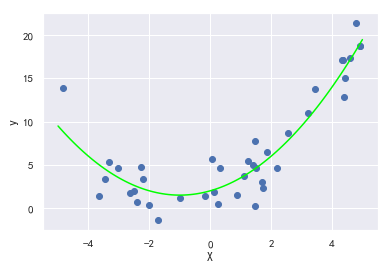

In [6]:
# 有误差的散点图
plt.scatter(X[:,0], y)

# 实际的曲线
line_x = np.linspace(-5, 5, 100)
line_y = a * line_x ** 2 + b * line_x + 2
plt.plot(line_x, line_y, color="#00ff00")

plt.xlabel('X')
plt.ylabel('y')

## PolynomialFeatures生成多项式特征

In [7]:
# 用于生成多项式特征的
from sklearn.preprocessing import PolynomialFeatures

In [8]:
"""
例如：有 a、b 两个特征，那么它的 2 次多项式的次数为 [1,a,b,a**2,ab,b**2]。

PolynomialFeatures 这个类有 3 个参数：
degree：控制多项式的次数；
interaction_only：默认为 False，如果指定为 True，那么就不会有特征自己和自己结合的项，组合的特征中没有 a**2 和 b**2；
include_bias：默认为 True 。如果为 True 的话，那么结果中就会有 0 次幂项，即全为 1 这一列。
"""
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
# 第一列x，第二列x**2
X_poly[:3]

array([[ 1.46255691,  2.13907272],
       [ 0.89531938,  0.80159679],
       [ 3.20005506, 10.24035238]])

In [9]:
np.square(X)[:3]

array([[ 2.13907272],
       [ 0.80159679],
       [10.24035238]])

## 多项式回归训练

In [10]:
# 构造多项式特征后就可以使用线性回归训练了
from sklearn.linear_model import LinearRegression

In [11]:
line_reg = LinearRegression()

line_reg.fit(X_poly, y)
y_predict = line_reg.predict(X_poly)

line_reg.intercept_, line_reg.coef_

(1.5618362635324177, array([0.95720331, 0.55182574]))

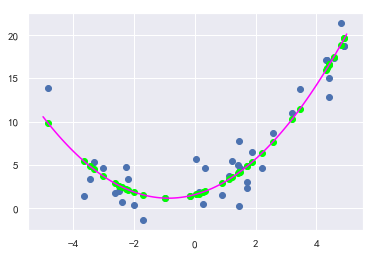

In [12]:
# 数据集
plt.scatter(X[:,0], y)
# 预测的点
plt.scatter(X[:,0], y_predict, color="#00ff00")

# 预测的曲线
line_x = np.linspace(-5, 5, 100)
# poly_features.fit_transform必须传入2维的矩阵
line_y = np.dot(poly_features.fit_transform(line_x.reshape(-1,1)), line_reg.coef_) + line_reg.intercept_
plt.plot(line_x, line_y, color="#ff00ff")

In [13]:
# 似乎是计算mse的
from sklearn.metrics import mean_squared_error

In [14]:
# 就是均方误差
mean_squared_error(y, y_predict), np.mean( (y_predict - y)**2 )

(4.17388116739019, 4.17388116739019)

## 多项式过拟合演示

演示一下过拟合的情况

degree:4, coef_: [ 1.26831953  0.38284981 -0.02588851  0.00922939]


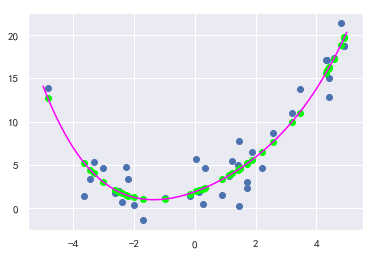

In [15]:
degree = 4
poly_features_d = PolynomialFeatures(degree = degree, include_bias=False)
X_poly_d = poly_features_d.fit_transform(X)

line_reg_d = LinearRegression()
line_reg_d.fit(X_poly_d, y)

# 截距和权重
intercept_, coef_ = line_reg_d.intercept_, line_reg_d.coef_

# 数据集
plt.scatter(X[:,0], y)
# 预测的点
plt.scatter(X[:,0], np.dot(X_poly_d, coef_) + intercept_, color="#00ff00")

# 预测的曲线
line_x = np.linspace(-5, 5, 100)
# poly_features.fit_transform必须传入2维的矩阵
line_y = np.dot(poly_features_d.fit_transform(line_x.reshape(-1,1)), coef_) + intercept_
plt.plot(line_x, line_y, color="#ff00ff")

# 这个已经是过拟合的了，只是一是样本较多不明显，而是画的x轴的范围较小
print("degree:%d, coef_:" % degree, coef_)

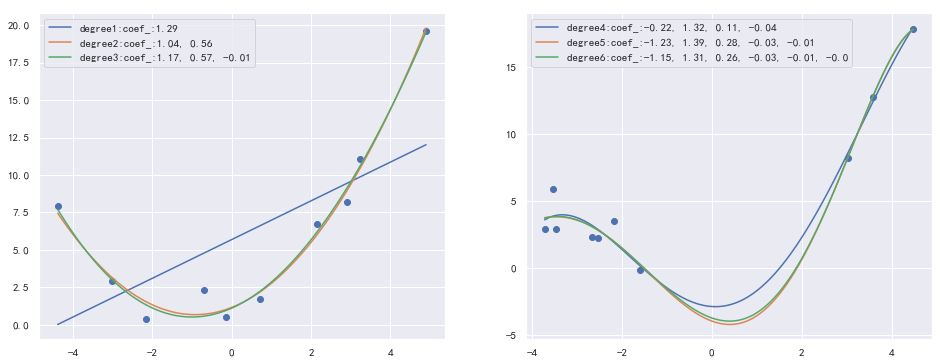

In [16]:
def show_fig(n, min_degree, max_degree, ax, a=0.5, b= 1,line_range=None, show_true=False):
    #a,b = 0.5, 1
    X = 10 * np.random.rand(n, 1) - 5 # x的取值范围
    y = a * np.square(X) + b * X + 2 + np.random.normal(0,1,size = X.shape)  #y = a*x^2 + b*x + 2
    y = y.reshape(y.size)
    
    if line_range is None:
        line_range = (X.min(), X.max())
    
    # 数据集
    ax.scatter(X[:,0], y)

    legends = []
    if show_true:
        legends.append("true:y = %d*x + %0.2f*x^2 + 2" % (b,a))
        line_x = np.linspace(line_range[0], line_range[1], 100)
        # poly_features.fit_transform必须传入2维的矩阵
        line_y = a * np.square(line_x) + b * line_x + 2
        ax.plot(line_x, line_y)
        
    for degree in range(min_degree, max_degree + 1):
        poly_features_d = PolynomialFeatures(degree = degree, include_bias=False)
        X_poly_d = poly_features_d.fit_transform(X)

        line_reg_d = LinearRegression()
        line_reg_d.fit(X_poly_d, y)

        # 截距和权重
        intercept_, coef_ = line_reg_d.intercept_, line_reg_d.coef_

        # 预测的曲线
        line_x = np.linspace(line_range[0], line_range[1], 100)
        # poly_features.fit_transform必须传入2维的矩阵
        line_y = np.dot(poly_features_d.fit_transform(line_x.reshape(-1,1)), coef_) + intercept_
        ax.plot(line_x, line_y)
        
        legends.append( "degree%d:coef_:%s" % (degree,", ".join(np.round(coef_,2).astype("str"))) )
        
    ax.legend(legends)

fig, axs = plt.subplots(1, 2, figsize=(16, 6))
show_fig(10, 1, 3, axs[0])
show_fig(10, 4, 6, axs[1])

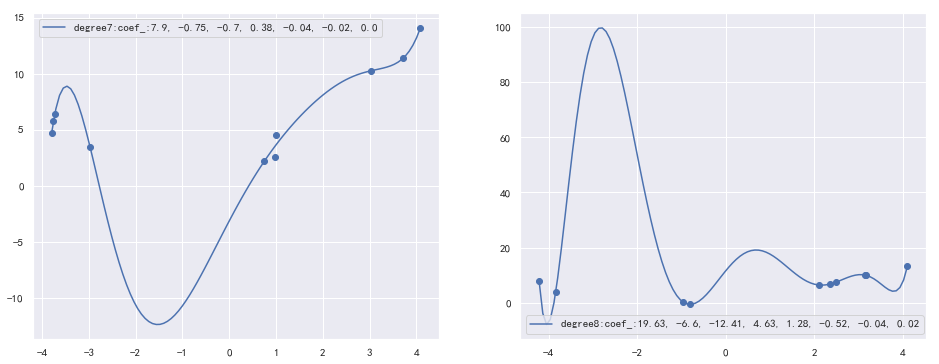

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
show_fig(10, 7, 7, axs[0])
show_fig(10, 8, 8, axs[1])

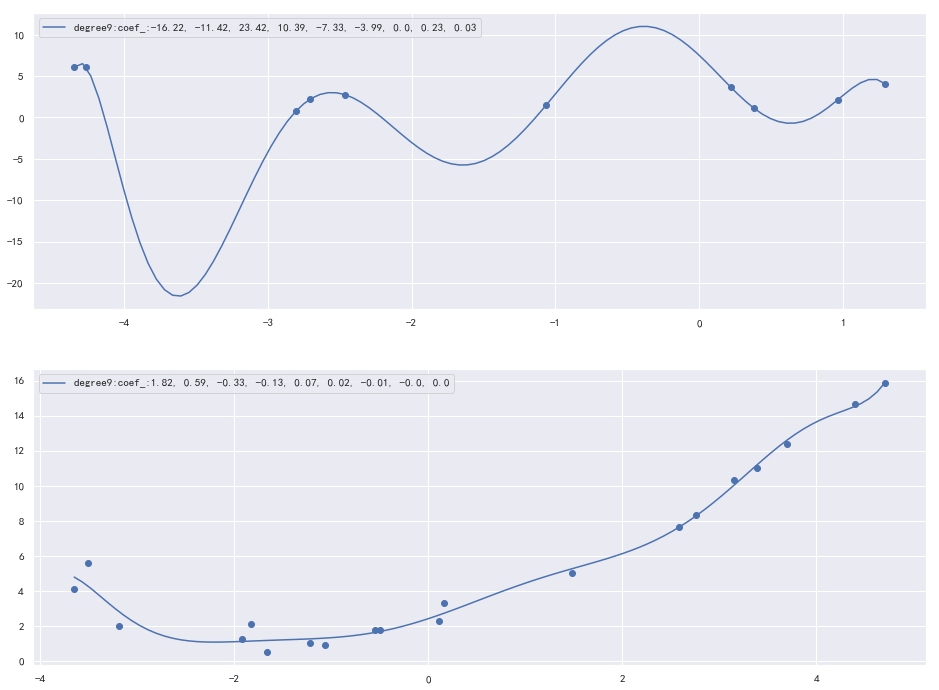

In [18]:
fig, axs = plt.subplots(2, 1, figsize=(16, 6 * 2))
show_fig(10, 9, 9, axs[0])
show_fig(20, 9, 9, axs[1])

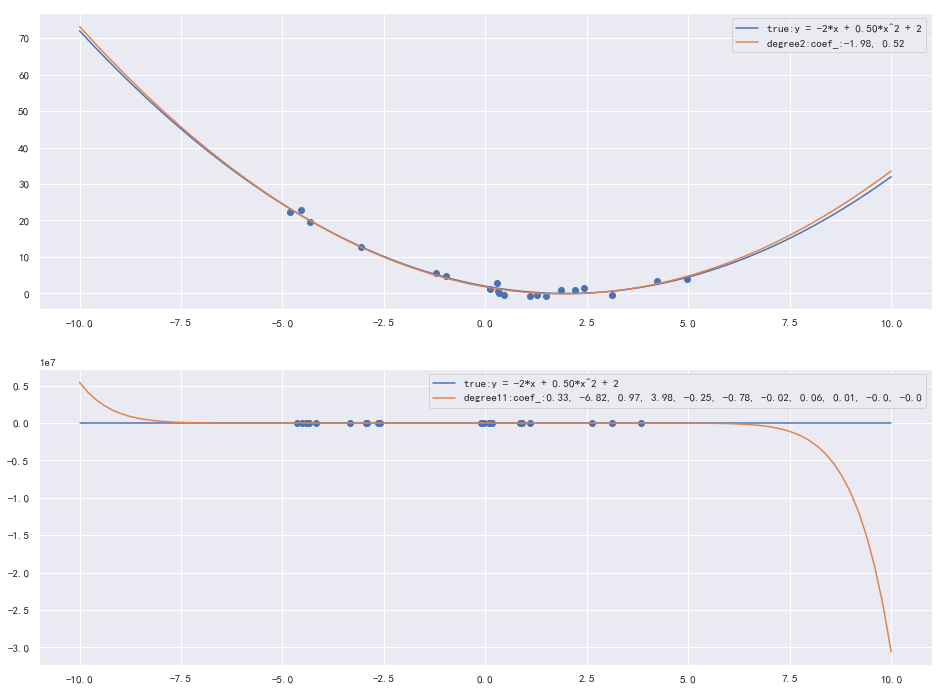

In [19]:
# a=0.5, b= 1生成的数据集，权重肯定很小(都是正数)
# a=0.5, b=-2 权重就大了
fig, axs = plt.subplots(2, 1, figsize=(16, 6 * 2))
show_fig(20, 2, 2, axs[0], a=0.5, b=-2, line_range=(-10,10), show_true=True)
show_fig(20, 11, 11, axs[1], a=0.5, b=-2, line_range=(-10,10), show_true=True)